# San Roque

SRPC 150MWac to 165MWac Floating Solar PV Power Plant

145000079 Feasibility Study

# waves2Foam vs IHFoam/OlaFlow

## COMPARISON OF DIFFERENT METHODS FOR GENERATION AND ABSORPTION OF WATER WAVES

- June 2019
- Revista de Engenharia Térmica 18(1):71-77
- DOI: 10.5380/reterm.v18i1.67053
- José CondeJosé Conde

- The knowledge of water wave characteristics
    - generation
    - propagation
    - transformation
    - breaking
- is fundamental for hydrodynamic studies and 
    the design of ocean, coastal and port structures.
    
- In addition to the small-scale experimental studies,
    the use of numerical models is also a very important tool in hydrodynamic studies. 
- To have reliable numerical results 
    - a proper validation is required. 
- The main objective of this paper is 
    - to compare different methods of 
        - wave generation and wave absorption 
        - in a numerical flume, 
    - and to find what is the most suited to simulate
        - non-breaking regular wave propagation 
        - in a two-dimensional flume 
        - in deep water condition. 
- The numerical simulations were made using the OpenFOAM® software package. 
- Two solvers, 
    - waves2Foam and 
    - IHFoam/OlaFlow, 
    - the utility GroovyBC and 
    - a mesh stretching technique are compared. 
- These numerical codes solve 
    - the transient Navier-Stokes equations and 
    - use a VoF (Volume of Fluid) method 
    - to identify the free surface. 
- A solution dependence study with the methods of 
    - wave generation and wave absorption is presented.
- The results are also compared 
    - with the theoretical wave and experimental data. 
- The results show that 
    - the different methods of generation 
        produce waves similar to the theoretical and the experimental ones, 
    - only slightly differences were visible. 
- The three method of 
    - wave dissipation considered produce very different results: 
    - IHFoam/OlaFlow is not able to dissipate the wave tested; 
    - the mesh stretching technique is able to dissipate the waves but 
        - produces a water level rise; 
    - the waves2Foam solver is able to dissipate properly the wave tested.

# Wave

# Wave

- 저수지의 파고
    - 가정 심해파
    - 대안거리: F
    - 풍속: U
    - SMB (Sverdruv Munk Bretschneider Modification) method
    - 다시사빌 (T. Saville)에 의한 수정
        - 처오름 높이를 포함한 파고 R

## SMB method

- 유의파고 h
- 파장 L

In [14]:
h1 = lambda U, F: 0.0283*0.0125*9.80665**(0.42-1) \
    * U**(2-.42*2) * F**0.42

In [17]:
print(0.0283*0.0125*9.80665**(0.42-1))
print(2-.42*2)

9.410538085939766e-05
1.1600000000000001


In [12]:
h = lambda U, F: 0.00086 * U**1.1 * F**0.45
L = lambda U, F: 0.011 * U**0.84 * F**.58

In [13]:
h(10,100)

0.08600000000000002

In [15]:
h1(10,100)

0.009410538085939767

In [20]:
%matplotlib notebook

In [36]:
%matplotlib inline

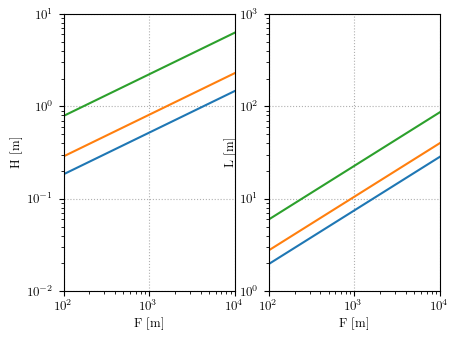

In [41]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# fig, ax = plt.subplots(nrows=nr, ncols=nc, figsize=[3*x for x in (golden,.7)])
fig, ax0 = plt.subplots(nrows=1, ncols=2, figsize=[3*x for x in (golden,1.2)])
ax = ax0[0]

# n_U = 2**4
# n_F = 2**4

# U = [i/(n_U-1)*100 for i in range(n_U)]
# F = [i/(n_F-1)*1000 for i in range(n_F)]

U = [20,30,75]
F = [100,1000,10000]

n_U = len(U)
n_F = len(F)

for ii in range(n_U):
    U_ii = U[ii]
    y = [h(U_ii,Fi) for Fi in F]
#         ax.plot3(U,y)
    ax.plot(F,y)
ax.set_xlabel('F [m]')
ax.set_ylabel('H [m]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([100,10000])
ax.set_ylim([.01,10])
ax.grid()

ax = ax0[1]
for ii in range(n_U):
    U_ii = U[ii]
#     F_ii = F[ii]
    y = [L(U_ii,F_ii) for F_ii in F]
#         ax.plot3(U,y)
    ax.plot(F,y)
# ax.set_xlabel('U [m/s]')
ax.set_xlabel('F [m]')
ax.set_ylabel('L [m]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([100,10000])
ax.set_ylim([1,1000])
ax.grid()

# plt.show()        

# FINE